The below do not use hotcode enci

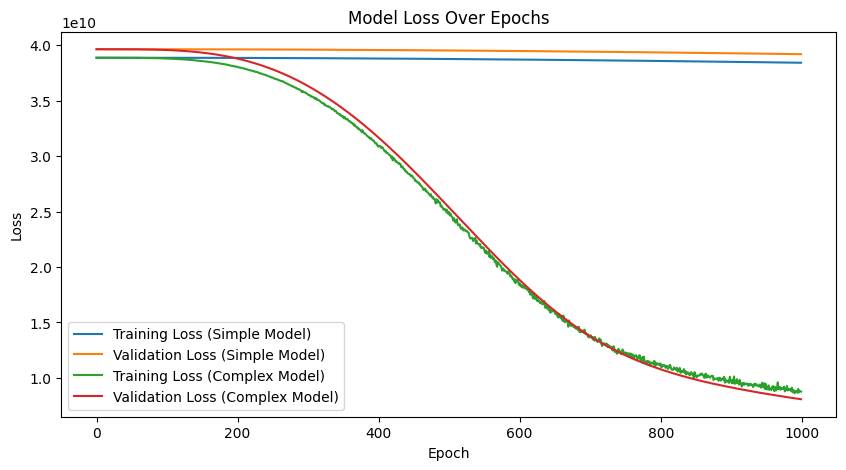

RMSE for Simple Model: 198005.5781
RMSE for Complex Model: 89879.3125


In [4]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load the training dataset
df_train = pd.read_csv('house-train.csv')

# Features used for modeling (excluding 'SalePrice')
useful_cols = [
    'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'FullBath',
    'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'LotFrontage', 'WoodDeckSF',
    'OpenPorchSF', 'ExterQual', 'Neighborhood', 'MSZoning', 'Alley', 'LotShape',
    'LandContour', 'Condition1', 'HouseStyle', 'MasVnrType', 'SaleCondition'
]

df_train_prepro = df_train[useful_cols].copy()

# Fill missing values
df_train_prepro['GarageArea'] = df_train_prepro['GarageArea'].fillna(df_train_prepro['GarageArea'].mean())
df_train_prepro['TotalBsmtSF'] = df_train_prepro['TotalBsmtSF'].fillna(df_train_prepro['TotalBsmtSF'].mean())

# One-hot encoding
df_train_prepro = pd.get_dummies(df_train_prepro, columns=[
    'Neighborhood', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'Condition1',
    'HouseStyle', 'MasVnrType', 'SaleCondition'
])
df_train_prepro = df_train_prepro.replace({True: 1, False: 0})

# Convert all columns to numeric (float) and handle NaN values
df_train_prepro = df_train_prepro.apply(pd.to_numeric, errors='coerce').fillna(0)

# Split into features and target
X = df_train_prepro.values
y = df_train['SalePrice'].values

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Define the neural network models
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

class MLPComplex(nn.Module):
    def __init__(self, input_size):
        super(MLPComplex, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Training function
def train_model(model, X_train, y_train, X_val, y_val, num_epochs=1000):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    train_losses, val_losses = [], []

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        optimizer.zero_grad()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

        # Validation phase
        model.eval()
        with torch.no_grad():
            y_val_pred = model(X_val)
            val_loss = criterion(y_val_pred, y_val)
            val_losses.append(val_loss.item())

    return train_losses, val_losses

# Instantiate the models
input_size = X_train.shape[1]
model_simple = MLP(input_size)
model_complex = MLPComplex(input_size)

# Train the models
train_losses_simple, val_losses_simple = train_model(model_simple, X_train, y_train, X_val, y_val)
train_losses_complex, val_losses_complex = train_model(model_complex, X_train, y_train, X_val, y_val)

# Plot training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses_simple, label='Training Loss (Simple Model)')
plt.plot(val_losses_simple, label='Validation Loss (Simple Model)')
plt.plot(train_losses_complex, label='Training Loss (Complex Model)')
# Continue from the plotting section
plt.plot(val_losses_complex, label='Validation Loss (Complex Model)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss Over Epochs')
plt.legend()
plt.show()

# Calculate RMSE function
def calculate_rmse(model, X, y_true):
    model.eval()
    with torch.no_grad():
        y_pred = model(X)
    mse = mean_squared_error(y_true.detach().numpy(), y_pred.detach().numpy())
    rmse = np.sqrt(mse)
    return rmse

# Calculate RMSE for both models on validation set
rmse_simple = calculate_rmse(model_simple, X_val, y_val)
rmse_complex = calculate_rmse(model_complex, X_val, y_val)

print(f'RMSE for Simple Model: {rmse_simple:.4f}')
print(f'RMSE for Complex Model: {rmse_complex:.4f}')

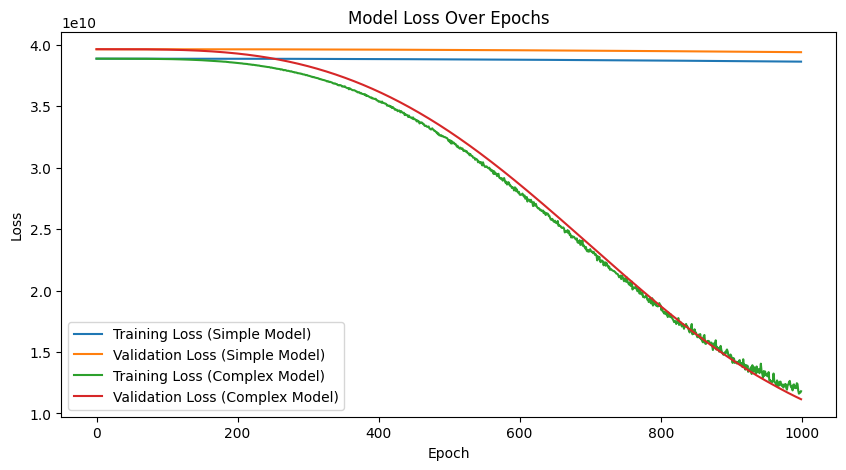

RMSE for Simple Model: 198527.4062
RMSE for Complex Model: 105640.0000


In [6]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Features used for modeling
useful_cols = [
    'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'FullBath',
    'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'LotFrontage', 'WoodDeckSF',
    'OpenPorchSF', 'ExterQual', 'Neighborhood', 'MSZoning', 'Alley', 'LotShape',
    'LandContour', 'Condition1', 'HouseStyle', 'MasVnrType', 'SaleCondition', 'SalePrice'
]

# Load and fill missing values
df_train = pd.read_csv('house-train.csv')[useful_cols]
df_train['GarageArea'] = df_train['GarageArea'].fillna(df_train['GarageArea'].mean())
df_train['TotalBsmtSF'] = df_train['TotalBsmtSF'].fillna(df_train['TotalBsmtSF'].mean())

# Map categorical features to integers
neighborhood_mapping = {n: i for i, n in enumerate(df_train['Neighborhood'].unique())}
df_train['Neighborhood'] = df_train['Neighborhood'].map(neighborhood_mapping)

mszoning_mapping = {n: i for i, n in enumerate(df_train['MSZoning'].unique())}
df_train['MSZoning'] = df_train['MSZoning'].map(mszoning_mapping)

# Repeat for other categorical variables

# Convert to numeric
df_train = df_train.apply(pd.to_numeric, errors='coerce').fillna(0)

# Split features and target
X = df_train.drop('SalePrice', axis=1).values
y = df_train['SalePrice'].values

# Standardization and train/val split
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

X_train, X_val, y_train, y_val = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Model training and evaluation is same as before
# Define the neural network models
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

class MLPComplex(nn.Module):
    def __init__(self, input_size):
        super(MLPComplex, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Training function
def train_model(model, X_train, y_train, X_val, y_val, num_epochs=1000):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    train_losses, val_losses = [], []

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        optimizer.zero_grad()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

        # Validation phase
        model.eval()
        with torch.no_grad():
            y_val_pred = model(X_val)
            val_loss = criterion(y_val_pred, y_val)
            val_losses.append(val_loss.item())

    return train_losses, val_losses

# Instantiate the models
input_size = X_train.shape[1]
model_simple = MLP(input_size)
model_complex = MLPComplex(input_size)

# Train the models
train_losses_simple, val_losses_simple = train_model(model_simple, X_train, y_train, X_val, y_val)
train_losses_complex, val_losses_complex = train_model(model_complex, X_train, y_train, X_val, y_val)

# Plot training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses_simple, label='Training Loss (Simple Model)')
plt.plot(val_losses_simple, label='Validation Loss (Simple Model)')
plt.plot(train_losses_complex, label='Training Loss (Complex Model)')
# Continue from the plotting section
plt.plot(val_losses_complex, label='Validation Loss (Complex Model)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss Over Epochs')
plt.legend()
plt.show()

# Calculate RMSE function
def calculate_rmse(model, X, y_true):
    model.eval()
    with torch.no_grad():
        y_pred = model(X)
    mse = mean_squared_error(y_true.detach().numpy(), y_pred.detach().numpy())
    rmse = np.sqrt(mse)
    return rmse

# Calculate RMSE for both models on validation set
rmse_simple = calculate_rmse(model_simple, X_val, y_val)
rmse_complex = calculate_rmse(model_complex, X_val, y_val)

print(f'RMSE for Simple Model: {rmse_simple:.4f}')
print(f'RMSE for Complex Model: {rmse_complex:.4f}')